64 128


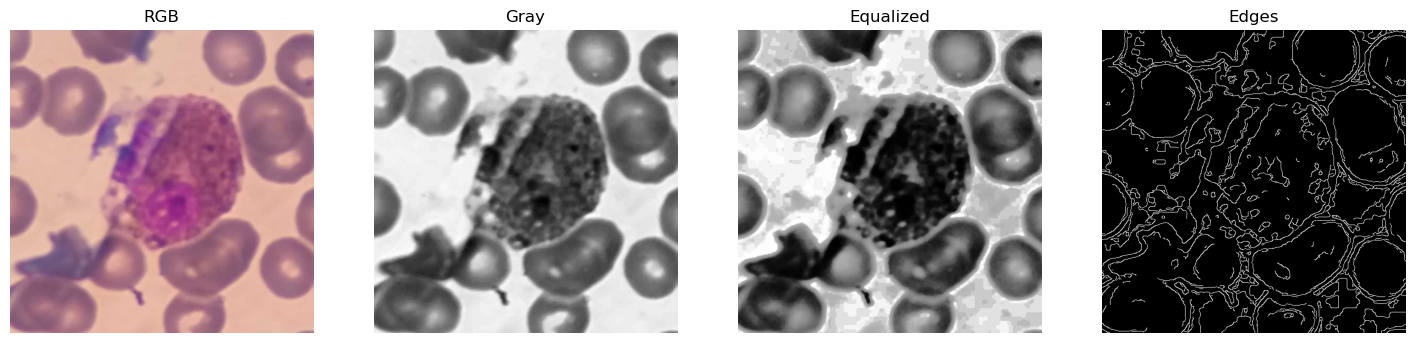

64 128
64 128
64 128
64 128
64 128
Tüm görseller işlendi ve kaydedildi.


In [3]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

def preprocess_pipeline(img_path, out_path):
    img_bgr = cv2.imread(str(img_path))
    if img_bgr is None:
        print(f"Görsel okunamadı: {img_path}")
        return None

    img_blur = cv2.medianBlur(img_bgr, 5)

    img_rgb = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)

    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    img_equalized = cv2.equalizeHist(img_gray)

    v = np.median(img_equalized)
    lower = int(max(0, 0.5*v))
    upper = int(min(255, 1*v))
    edges = cv2.Canny(img_equalized, lower, upper)
    print(lower, upper)

    output_dir = Path(out_path)
    output_dir.mkdir(parents=True, exist_ok=True)
    stages = {"blur": img_blur, "gray": img_gray, "equalized": img_equalized, "edges": edges}
    for stage, image in stages.items():
        save_path = output_dir / f"{Path(img_path).stem}_{stage}.jpg"
        cv2.imwrite(str(save_path), image)

    return {
        "blur": img_blur,
        "rgb": img_rgb,
        "gray": img_gray,
        "equalized": img_equalized,
        "edges": edges
    }

sample_path = Path("../data/raabin_wbc/1.jpg")
output_dir = Path("../outputs")
results = preprocess_pipeline(sample_path, output_dir)

if results:
    fig, ax = plt.subplots(1, 4, figsize=(18,5))
    ax[0].imshow(results["rgb"]); ax[0].set_title("RGB")
    ax[1].imshow(results["gray"], cmap="gray"); ax[1].set_title("Gray")
    ax[2].imshow(results["equalized"], cmap="gray"); ax[2].set_title("Equalized")
    ax[3].imshow(results["edges"], cmap="gray"); ax[3].set_title("Edges")
    for a in ax: a.axis("off")
    plt.show()

input_dir = Path("../data/raabin_wbc/")
for img_path in input_dir.glob("*.jpg"):
    preprocess_pipeline(img_path, output_dir)

print("Tüm görseller işlendi ve kaydedildi.")